# Computer Vision 

## Project

In [3]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from operator import itemgetter
import random
import os

In [13]:
def draw_matches(img1, kp1, img2, kp2, space, radius, thickness, color):
    if len(img1.shape) == 3:
        new_shape = (
            max(img1.shape[0], img2.shape[0]),
            img1.shape[1] + space + img2.shape[1],
            img1.shape[2],
        )
    elif len(img1.shape) == 2:
        new_shape = (
            max(img1.shape[0], img2.shape[0]),
            img1.shape[1] + space + img2.shape[1],
        )
    new_img = np.zeros(new_shape, type(img1.flat[0]))
    new_img[0 : img1.shape[0], 0 : img1.shape[1]] = img1
    new_img[
        0 : img2.shape[0], img1.shape[1] + space : img1.shape[1] + space + img2.shape[1]
    ] = img2


    for end1, end2 in zip(kp1, kp2):
        c = color
        if not color:
            c = (
                np.random.randint(0, 256, 3)
                if len(img1.shape) == 3
                else np.random.randint(0, 256)
            )
        end1 = tuple(end1)
        end2 = tuple(np.array([img1.shape[1] + space, 0]) + end2)
        c = tuple(int(x) for x in c)
        
        cv2.line(new_img, end1, end2, c, thickness)
        cv2.circle(new_img, end1, radius, c, thickness)
        cv2.circle(new_img, end2, radius, c, thickness)

    return new_img


def imshow(img, figsize=(8, 8)):
    plt.figure(figsize=figsize)
    plt.axis("off")
    plt.imshow(img)

## step 1:

A) Compute the x and y derivatives on the image

In [4]:
def Compute_GRAD(image):
    kernel_x = (1/8) * np.array([[1, 0, -1],
                                 [2, 0, -2],
                                 [1, 0, -1]])
    kernel_y = (1/8) * np.array([[1, 2, 1],
                                 [0, 0, 0],
                                 [-1, -2, -1]])
    grad_x = cv2.filter2D(image, -1, kernel_x)
    grad_y = cv2.filter2D(image, -1, kernel_y)
    return grad_x, grad_y

### Feature Detection

In [9]:
def Compute_HARRIS_MAT(grad_x, grad_y):
    grad_x2 = grad_x**2
    grad_y2 = grad_y**2
    grad_x2 = cv2.GaussianBlur(grad_x2, (5, 5), 3, 3)
    grad_y = cv2.GaussianBlur(grad_y2, (5, 5), 3, 3)
    grad_xy = cv2.GaussianBlur(grad_x*grad_y , (5, 5), 3, 3)
    return grad_x2, grad_y2, grad_xy

def Create_H(grad_x2, grad_y2, grad_xy):
    upper_left = cv2.boxFilter(grad_x2, ksize=(5,5), ddepth= -1, normalize = False)
    upper_right = cv2.boxFilter(grad_xy, ksize=(5,5), ddepth= -1, normalize = False)
#     lower_left = cv2.boxFilter(grad_xy, ksize=(5,5), ddepth= -1, normalize = False)
    lower_right = cv2.boxFilter(grad_y2, ksize=(5,5), ddepth=-1,normalize = False)
    return upper_left ,lower_right, upper_right
    
def Corner_Response(grad_x2, grad_y2, grad_xy, alpha = 0.04):
    return ((grad_x2*grad_y2 - grad_xy*grad_xy) - alpha*(grad_x2+grad_y2))

def Threshold(array: np.ndarray, thresh: float):
    thresh_array = np.copy(array)
    thresh_array[array < thresh] = 0
    return thresh_array

def Non_Max_Supression(array: np.ndarray, kernel_size: int = 5):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    dilated = cv2.dilate(array, kernel, borderType=cv2.BORDER_CONSTANT, borderValue=[0, 0, 0])
    max_array = np.copy(array)
    max_array[max_array < dilated] = 0
    return max_array

In [10]:
def Computate_Coner_Strength(img):
    I_x, I_y = Compute_GRAD(img)
    I_x2, I_y2, I_xy = Compute_HARRIS_MAT(I_x, I_y)
    H_x, H_y, H_xy = Create_H(I_x2, I_y2, I_xy)
    R = Corner_Response(H_x, H_y, H_xy)
    thresh = Threshold(R, 0.001)
#     print(np.sum(thresh))
    res = Non_Max_Supression(thresh, 5)
    return res

## Step 1 Results

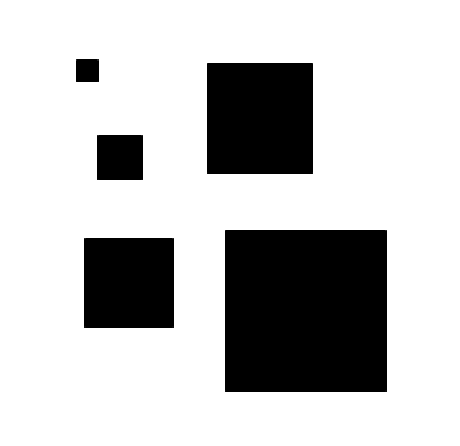

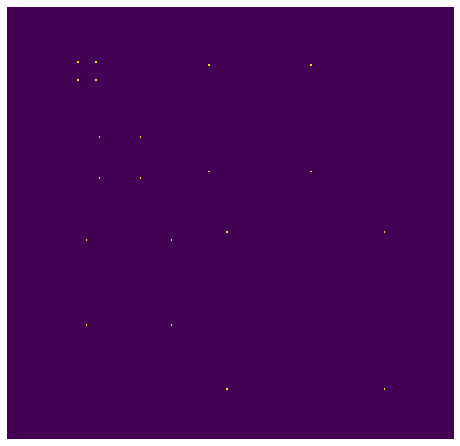

In [15]:
#part1
path = 'project_images/Boxes.png'
img = cv2.imread(path, 0)/255
real_img = cv2.imread(path)

result = Computate_Coner_Strength(img)

imshow(real_img)
imshow(result*255)

The results will be saved in Results folder.

In [29]:
cv2.imwrite("Results/1a.png", result*255)

True

In [32]:
#part2
path = 'project_images/Rainier1.png'
img = cv2.imread(path, 0)/255
real_img = cv2.imread(path)

#part2
path = 'project_images/Rainier2.png'
img_second = cv2.imread(path, 0)/255
real_img_second = cv2.imread(path)

result = Computate_Coner_Strength(img)
result_second = Computate_Coner_Strength(img_second)

keypoints = Extract_Keypoints(result)
patches = Feature_Description(img, keypoints)

keypoints_second = Extract_Keypoints(result_second)
patches_second = Feature_Description(img_second, keypoints_second)

True

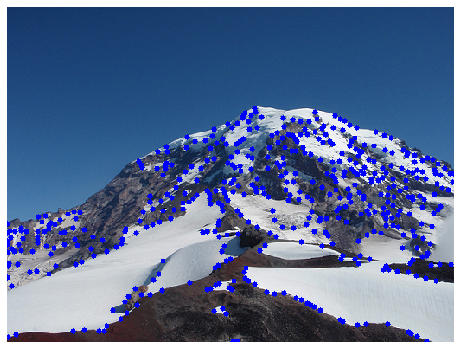

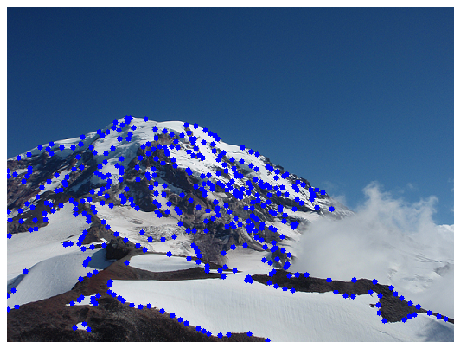

In [39]:
for i in range(len(keypoints)): 
    x1, y1 = keypoints[i][0], keypoints[i][1]
#     print("x1, y1: ",x1,y1)
    circles_1 = cv2.circle(real_img, (y1, x1), 3, (255, 0, 0), -1)

imshow(circles_1[..., ::-1])    
cv2.imwrite("Results/1b.png", circles_1) 
    
for i in range(len(keypoints_second)):
    x2, y2 = keypoints_second[i][0], keypoints_second[i][1]
#     print("x2, y2: ",x2,y2)
    circles_2 = cv2.circle(real_img_second, (y2, x2), 3, (255, 0, 0), -1)
    
imshow(circles_2[..., ::-1])    
cv2.imwrite("Results/1c.png", circles_2) 


### Feature Description

In this section I implemented SIFT Descriptor, Rotation Invariant, and Scale Invariant.

In [40]:
def Extract_Keypoints(corner_strength):        
    keypoints = []
    for row in range(corner_strength.shape[0]):
        for column in range(corner_strength.shape[1]):
            if corner_strength[row][column]>0 :
                keypoint = corner_strength[row][column]
                keypoints.append([row,column,keypoint])
    return keypoints

def Feature_Description(img, keypoints):
    dx, dy = Compute_GRAD(img)
    magnitude, angle = np.zeros_like(dx), np.zeros_like(dx)
    magnitude, angle = cv2.cartToPolar(dx, dy, magnitude, angle, angleInDegrees=True)
    bins = np.linspace(0, 360, 9, endpoint=True)

    patches = []
    left, top, bottom, right = 7, 7, 8, 8
    
    descriptors = []
    for index in range(len(keypoints)):
        row = keypoints[index][0] + left
        col = keypoints[index][1] + top
        image = np.array(img[row - top: row + bottom + 1, col - left: col + right + 1])
        magnitude = np.array(magnitude[row - top: row + bottom + 1,
                                        col - left: col + right + 1])
        orientation = np.array(angle[row - top: row + bottom + 1,
                                      col - left: col + right + 1])
        descriptors_i = np.zeros((16,8))
        rotation = np.zeros((1,8))
        cnt = 0
        for i in range(0,16,4):
            for j in range(0,16,4):
                test = np.array(orientation[i:i+4, j:j+4])
                values, angles = np.histogram(a=test, bins=bins)
                descriptors_i[cnt] = values/16
#                 print(descriptors_i)
                cnt +=1
        dominant_rotation = np.argmax(np.sum(descriptors_i, axis=0))
        if dominant_rotation != 0:
            descriptors_i = np.roll(descriptors_i, -dominant_rotation, axis=1)
#         print("new_desc:", descriptors_i)
        temp = np.clip(descriptors_i, a_min=0.0, a_max=0.2)
        contrast_invariant = temp**2/ np.sum(temp**2)
#         print(np.sum(contrast_invariant))
        descriptors.append([keypoints[index][0],keypoints[index][1],contrast_invariant])
    return descriptors

### Feature matching

In [41]:
def SSD(feature_1, feature_2):
    distance = np.subtract(feature_1, feature_2)
    return float(np.sum(np.power(distance, 2)))

In [42]:
def Ratio_SSD(feature_1, feature_2, feature_3):
    return SSD(feature_1, feature_2)/SSD(feature_1, feature_3)

In [43]:
def Find_Matches(features_1: list, features_2: list, method: str = 'ssd',
                 threshold_ratio: float = 0.8, threshold: float = 0.2):
    
    distance_matrix = np.zeros((len(features_1), len(features_2)),dtype=np.float32)

    for row, feature_1 in enumerate(features_1):
        for col, feature_2 in enumerate(features_2):
            distance_matrix[row, col] = SSD(feature_1[2],feature_2[2])
    matched_features = []
    for row, feature_1 in enumerate(features_1):
        best_match = np.argmin(distance_matrix[row])
        if method == 'ssd':
            if distance_matrix[row, best_match] < threshold:
                matched_features.append([row, best_match, distance_matrix[row, best_match]])
        elif method == 'ratio_ssd':
            min_matches = np.argpartition(distance_matrix[row], (0, 1))[:2]
#             matched_features.append([row, min_matches, distance_matrix[row, min_matches[0]] / distance_matrix[row, min_matches[1]]])
            if (distance_matrix[row, min_matches[0]] / distance_matrix[row, min_matches[1]]) < threshold_ratio:
                matched_features.append([row, min_matches[0], distance_matrix[row, min_matches[0]]])
    return matched_features

### Draw Matches

Showing all matches

In [46]:
result = Computate_Coner_Strength(img)
result_second = Computate_Coner_Strength(img_second)

keypoints = Extract_Keypoints(result)
patches = Feature_Description(img, keypoints)

keypoints_second = Extract_Keypoints(result_second)
patches_second = Feature_Description(img_second, keypoints_second)

matched = Find_Matches(patches, patches_second, 'ratio_ssd')

keypoints1 = np.array([patches[m[0]][:2] for m in matched])
keypoints2 = np.array([patches_second[m[1]][:2] for m in matched])
    
first_keypoints1 = keypoints1[..., ::-1] # (x, y) to (y, x) for OpenCV compatibility
first_keypoints2 = keypoints2[..., ::-1]

## Step 2 Results

True

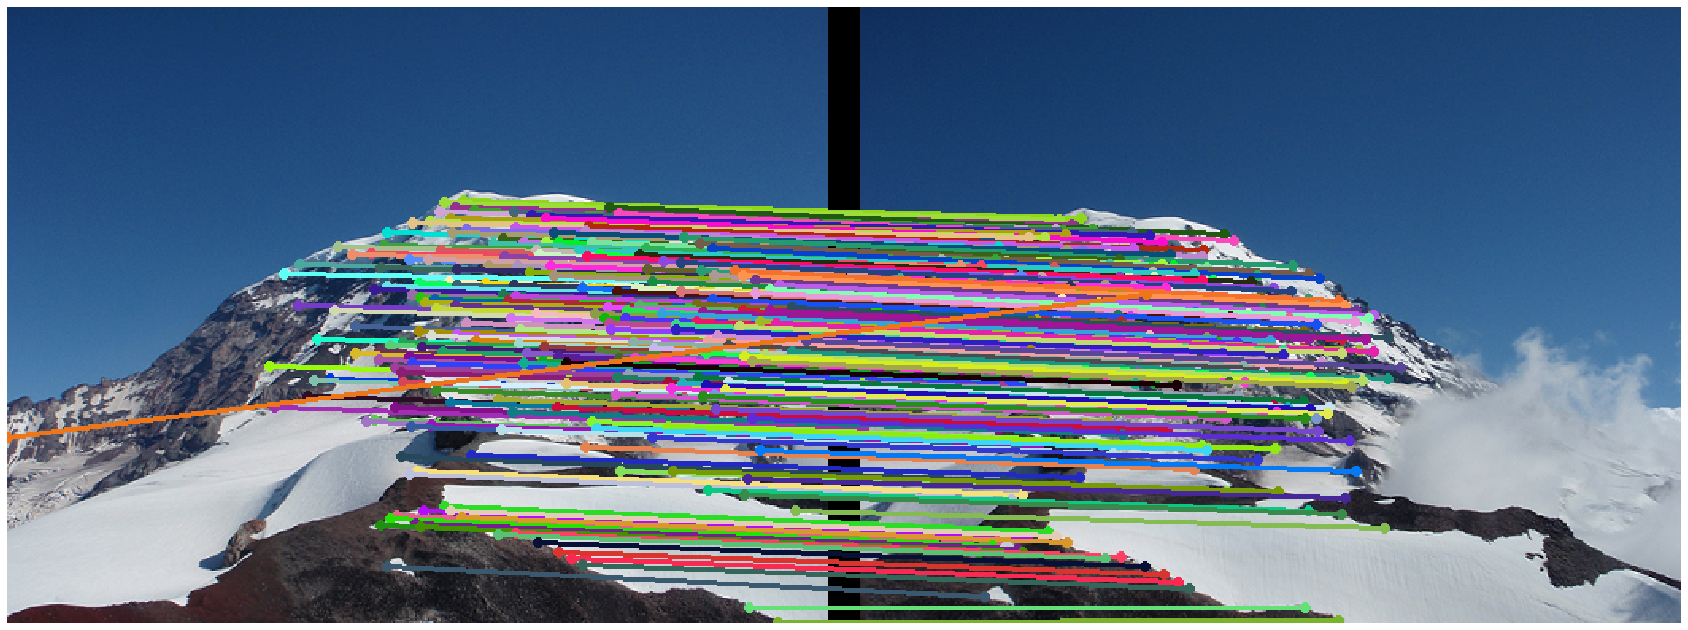

In [47]:
first_outImg = draw_matches(
    real_img,
    first_keypoints1,
    real_img_second,
    first_keypoints2,
    space=20,
    radius=2,
    thickness=2,
    color=None,
)
first_outImg = first_outImg[..., ::-1]  # BGR to RGB
imshow(first_outImg, figsize=(30, 20))
cv2.imwrite("3a.png", first_outImg)

## Panorama Mosaic Stitching

In [48]:
keypoints1 = np.array([patches[m[0]][:2] for m in matched])
keypoints2 = np.array([patches_second[m[1]][:2] for m in matched])

In [49]:
def project(H, x, y):
    out = np.matmul(H, (x, y, 1))
    return out[0]/out[2], out[1]/out[2]

In [50]:
# Test your function with it
# cv2.perspectiveTransform(...)

In [51]:
def computeInlierCount(H, matches, inlierThreshold: float = 0.2):
    inlier = 0
    inlier_list = []
    for ind in range(len(matches)):
#         print("index", ind)
        x1, y1 = patches[matched[ind][0]][0], patches[matched[ind][0]][1]
        x2, y2 = patches_second[matched[ind][1]][0], patches_second[matched[ind][1]][1]
        new_x, new_y = project(H, x1, y1)
#         print("new_xy:",new_x,new_y)
#         print("real_xy:",x2,y2)
        distance_x, distance_y = abs(x2-new_x), abs(y2-new_y)
#         print(distance_x, distance_y)
        if distance_x < inlierThreshold and distance_y < inlierThreshold:
            inlier += 1
            inlier_list.append(ind) 
    return inlier, inlier_list

In [52]:
def RANSAC(matches, numIterations, inlierThreshold):
    max_inlier_count = 0
    #Not sure that I need best matches or not
    best_matches = []
    
    for index in range(numIterations):
        random_matches = np.random.randint(0, len(matches), 4)
        points_img1 = np.array([keypoints1[random_matches[0]],
                                keypoints1[random_matches[1]], 
                                keypoints1[random_matches[2]], 
                                keypoints1[random_matches[3]]])
        points_img2 = np.array([keypoints2[random_matches[0]],
                                keypoints2[random_matches[1]], 
                                keypoints2[random_matches[2]], 
                                keypoints2[random_matches[3]]])
        
        homography, mask = cv2.findHomography(points_img1, points_img2)
        inlier_count, inlier_list = computeInlierCount(homography, matches, inlierThreshold)

        if inlier_count > max_inlier_count:
            max_inlier_count = inlier_count
            best_homography = homography
            best_matches = random_matches
            
    return best_homography

In [53]:
def Best_Homography(matches, numIterations, inlierThreshold):
    homography = RANSAC(matches, numIterations, inlierThreshold)
    homInv = np.linalg.inv(homography)
    inlier_count, inlier_list = computeInlierCount(homography, matches, inlierThreshold)
    print("inlier_count", inlier_count)
    inlier_1 = np.array([keypoints1[ind] for ind in inlier_list])
    inlier_2 = np.array([keypoints2[ind] for ind in inlier_list])
    print("Done.")
    return inlier_1, inlier_2

In [54]:
inliers_1, inliers_2 = Best_Homography(matched, 100, 0.5)

inlier_count 77
Done.


In [55]:
def Refined_Homography(inliers_1, inliers_2, matches, inlierThreshold):
    homography, mask = cv2.findHomography(inliers_1, inliers_2)
    homInv = np.linalg.inv(homography)
    inlier_count, inlier_list = computeInlierCount(homography, matches, inlierThreshold)
    inlier_1 = np.array([keypoints1[ind] for ind in inlier_list])
    inlier_2 = np.array([keypoints2[ind] for ind in inlier_list])
    print("Homography refined.")
    return homography, homInv, inlier_1, inlier_2

In [56]:
homography, homInv, inlier_1, inlier_2 = Refined_Homography(inliers_1, inliers_2, matched, 0.5)

Homography refined.


## Step 3 Results

Showing the result after applying RANSAC. Here, I am only plotting the inliers.

In [57]:
inliers_1 = inliers_1[..., ::-1] 
inliers_2 = inliers_2[..., ::-1]

In [58]:
print(len(inliers_2))

77


True

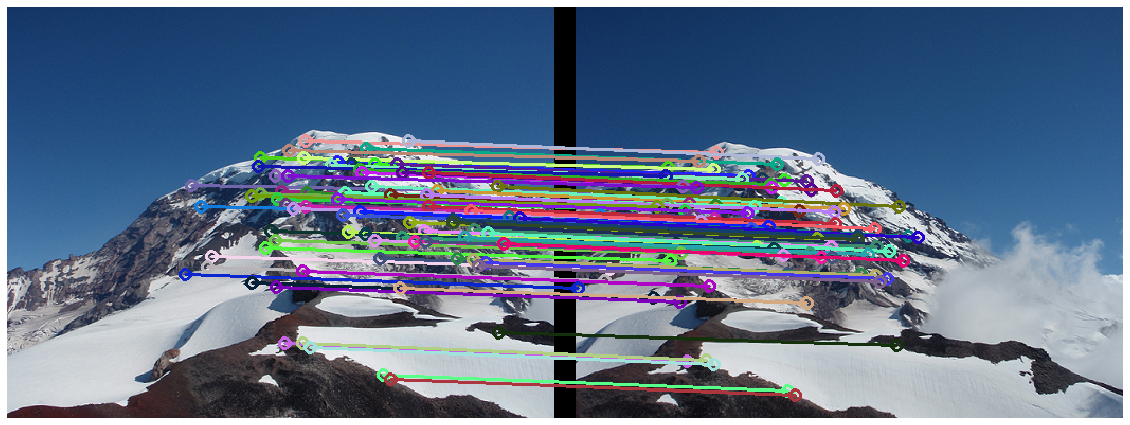

In [59]:
outImg = draw_matches(
    real_img,
    inliers_1,
    real_img_second,
    inliers_2,
    space=20,
    radius=5,
    thickness=2,
    color=None,
)
outImg = outImg[..., ::-1]  # BGR to RGB
imshow(outImg, figsize=(20, 12))
cv2.imwrite("Results/3b.png", outImg)

### Image Stitching

In [60]:
def stitch(img_1, img_2, hom, homInv):
    top_left_x, top_left_y = project(homInv, 0, 0)
    top_right_x, top_right_y = project(homInv, 0, img_2.shape[1])
    bottom_left_x, bottom_left_y = project(homInv, img_2.shape[0], 0)
    bottom_right_x, bottom_right_y = project(homInv, img_2.shape[0], img_2.shape[1])
        
    top = int(max(0, img_1.shape[1], top_left_y, top_right_y, bottom_left_y, bottom_right_y))+1
    left = int(min(0, img_1.shape[0], top_left_x, top_right_x, bottom_left_x, bottom_right_x))+1
    bottom = int(min(0, img_1.shape[1], bottom_right_y, bottom_left_y, top_left_y, top_right_y))+1
    right = int(max(0, img_1.shape[0], bottom_right_x, top_right_x, top_left_x, bottom_left_x))+1
    
    width = top - bottom +1
    height = right - left +1
        
    stitchedImage = np.zeros((height, width, 3), dtype=np.uint8)
    
    stitchedImage[abs(left):abs(left) + img_1.shape[0], abs(bottom):abs(bottom) + img_1.shape[1]] = img_1
    
    for row in range(height):
        for column in range(width):
            new_x, new_y = project(hom, row - abs(left), column - abs(bottom))
            if new_x > 0 and new_x < (img_2.shape[0] + 1)  and new_y > 0 and new_y < (img_2.shape[1] + 1):
                img_out = cv2.getRectSubPix(img_2, (1, 1), (new_y, new_x))
                stitchedImage[row, column] = img_out[0][0]

    return stitchedImage

In [61]:
stitched_img = stitch(real_img, real_img_second, homography, homInv)

## Step 4 Results

In [ ]:
cv2.imwrite("Results/4.png", stitched_img)
cv2.imwrite("test.png", stitched_img)

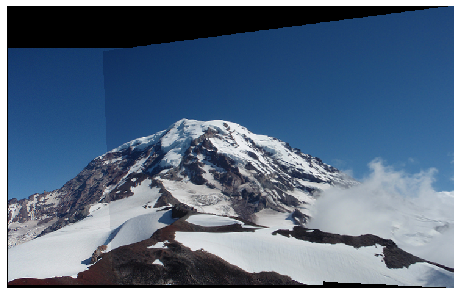

In [63]:
imshow(stitched_img[..., ::-1]/np.max(stitched_img))

## Extra Credit 1

In [42]:
Rainer = ["Rainier1.png", "Rainier2.png", "Rainier3.png", "Rainier4.png", "Rainier5.png", "Rainier6.png" ]
path = "project_images"

Number of keypoints: 489
inlier_count 27
Done.
Homography refined.
Number of keypoints: 642
inlier_count 24
Done.
Homography refined.
Number of keypoints: 956
inlier_count 43
Done.
Homography refined.
Number of keypoints: 987


/Users/shimash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


inlier_count 24
Done.
Homography refined.


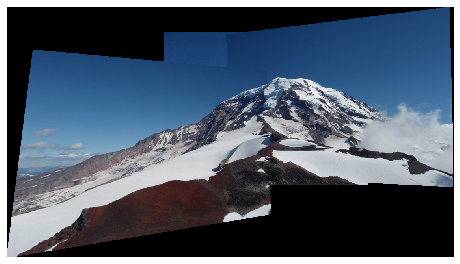

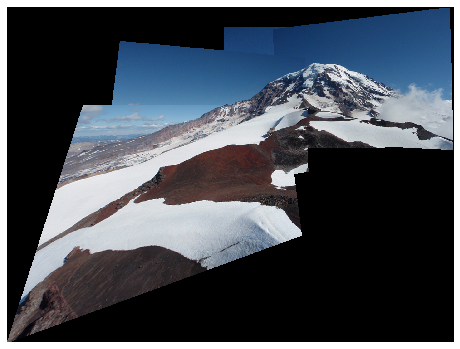

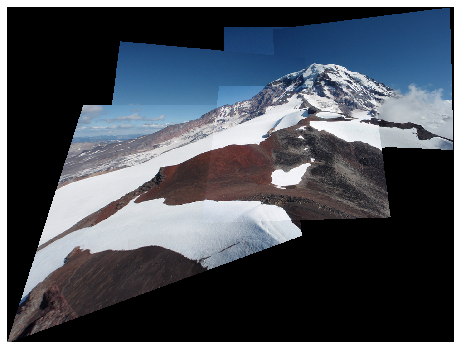

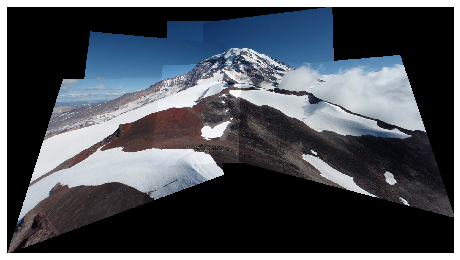

In [45]:
for i in range(4):
    load_img = os.path.join(path, Rainer[i+2])
    image_second = cv2.imread(load_img, 0)/255
    real_image_second = cv2.imread(load_img)
    
    image  = cv2.imread("test.png", 0)/255
    real_image = cv2.imread("test.png")
    
    result = Computate_Coner_Strength(image)
    result_second = Computate_Coner_Strength(image_second)
    
    keypoints = Extract_Keypoints(result)
    patches = Feature_Description(image, keypoints)
    
    print("Number of keypoints:",len(keypoints))
    
    keypoints_second = Extract_Keypoints(result_second)
    patches_second = Feature_Description(image_second, keypoints_second)


    matched = Find_Matches(patches, patches_second, 'ratio_ssd')

    keypoints1 = np.array([patches[m[0]][:2] for m in matched])
    keypoints2 = np.array([patches_second[m[1]][:2] for m in matched])
    
    first_keypoints1 = keypoints1[..., ::-1] # (x, y) to (y, x) for OpenCV compatibility
    first_keypoints2 = keypoints2[..., ::-1]

    inliers_1, inliers_2 = Best_Homography(matched, 200, 0.5)
    
    homography, homInv, inlier_1, inlier_2 = Refined_Homography(inliers_1, inliers_2, matched, 0.5)    
    new_stitched = stitch(real_image, real_image_second, homography, homInv)
    
    imshow(new_stitched[..., ::-1]/np.max(new_stitched))
    cv2.imwrite("test.png", new_stitched)

## Extra Credit 2

I took these photos from the balcony of my house! 

In [74]:
Shima = ["shima_1.jpg", "shima_2.jpg", "shima_3.jpg", "shima_4.jpg", "shima_5.jpg"]
path = "project_images/My_Images"

Number of keypoints: 815
inlier_count 22
Done.
Homography refined.
Number of keypoints: 1136
inlier_count 23
Done.
Homography refined.
Number of keypoints: 1300
inlier_count 20
Done.
Homography refined.


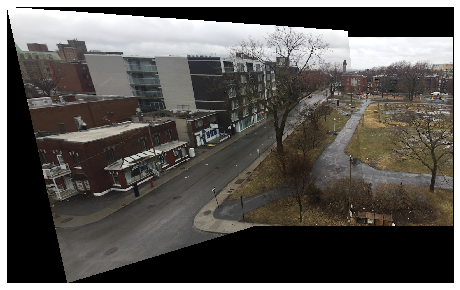

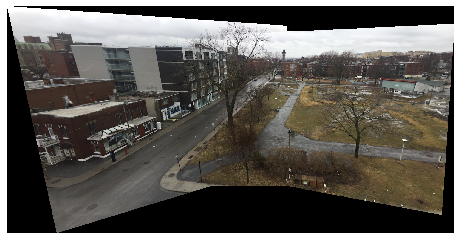

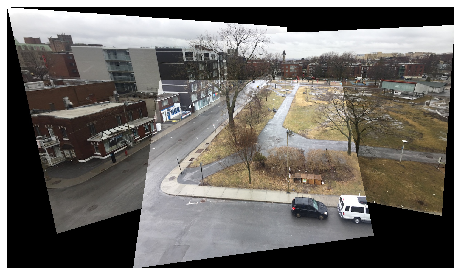

In [75]:
for i in range(3):
    load_img = os.path.join(path, Shima[i+1])
    image_second = cv2.imread(load_img, 0)/255
    real_image_second = cv2.imread(load_img)
    
    image  = cv2.imread("test_2.jpg", 0)/255
    real_image = cv2.imread("test_2.jpg")
    
    result = Computate_Coner_Strength(image)
    result_second = Computate_Coner_Strength(image_second)
    
    keypoints = Extract_Keypoints(result)
    patches = Feature_Description(image, keypoints)
    
    print("Number of keypoints:",len(keypoints))
    
    keypoints_second = Extract_Keypoints(result_second)
    patches_second = Feature_Description(image_second, keypoints_second)


    matched = Find_Matches(patches, patches_second, 'ratio_ssd')

    keypoints1 = np.array([patches[m[0]][:2] for m in matched])
    keypoints2 = np.array([patches_second[m[1]][:2] for m in matched])
    
    first_keypoints1 = keypoints1[..., ::-1] # (x, y) to (y, x) for OpenCV compatibility
    first_keypoints2 = keypoints2[..., ::-1]

    inliers_1, inliers_2 = Best_Homography(matched, 100, 0.5)
    
    homography, homInv, inlier_1, inlier_2 = Refined_Homography(inliers_1, inliers_2, matched, 0.5)    
    new_stitched = stitch(real_image, real_image_second, homography, homInv)
    
    imshow(new_stitched[..., ::-1]/np.max(new_stitched))
    cv2.imwrite("test_2.jpg", new_stitched) 

In [77]:
cv2.imwrite("Results/extra_2.png", new_stitched) 

True

## Extra Credit 4

I will implement the center-weighting method in the following cells. First I will create a weight mask which is the energy of each pixel of the image

In [183]:
def create_mask(height, width):
    max = 0.0
    buffer = np.zeros(height * width)
    for row in range(height):
        for column in range(width):
            dist = min( min(row, height - row), min(column, width - column)) + 1
            buffer[(row*width) + column] = dist
            if dist > max:
                max = dist
    for row in range(height):
        for column in range(width):
            buffer[(row * width) + column] /= max
    return buffer

In [188]:
def stitch(img_1, img_2, hom, homInv):
    top_left_x, top_left_y = project(homInv, 0, 0)
    top_right_x, top_right_y = project(homInv, 0, img_2.shape[1])
    bottom_left_x, bottom_left_y = project(homInv, img_2.shape[0], 0)
    bottom_right_x, bottom_right_y = project(homInv, img_2.shape[0], img_2.shape[1])
        
    top = int(max(0, img_1.shape[1], top_left_y, top_right_y, bottom_left_y, bottom_right_y))+1
    left = int(min(0, img_1.shape[0], top_left_x, top_right_x, bottom_left_x, bottom_right_x))+1
    bottom = int(min(0, img_1.shape[1], bottom_right_y, bottom_left_y, top_left_y, top_right_y))+1
    right = int(max(0, img_1.shape[0], bottom_right_x, top_right_x, top_left_x, bottom_left_x))+1
    
    width = top - bottom +1
    height = right - left +1
        
    stitchedImage = np.zeros((height, width, 3), dtype=np.uint8)
    
#     image1Weights = create_mask(img_1.shape[0],img_1.shape[1])
#     print(len(image1Weights))

#     image2Weights = create_mask(img_2.shape[0],img_2.shape[1])
#     print(len(image2Weights))

    stitchedImage[abs(left):abs(left) + img_1.shape[0], abs(bottom):abs(bottom) + img_1.shape[1]] = img_1
    temp = [300, 500, 2000]
    for row in range(height):
        for column in range(width):
            new_x, new_y = project(hom, row - abs(left), column - abs(bottom))
            if new_x > 0 and new_x < (img_2.shape[0] + 1)  and new_y > 0 and new_y < (img_2.shape[1] + 1):
                img_out = cv2.getRectSubPix(img_2, (1, 1), (new_y, new_x))
                if stitchedImage[row, column, 0]==0 and stitchedImage[row, column, 1]==0 and stitchedImage[row, column, 2]==0:  
                    stitchedImage[row, column] = img_out[0][0]
                else:
#                     print(stitchedImage[row, column])
#                     print("img_out", img_out[0][0])
                    temp[0] = max(stitchedImage[row, column][0], img_out[0][0][0]) - min(stitchedImage[row, column][0], img_out[0][0][0])
                    temp[1] = max(stitchedImage[row, column][1], img_out[0][0][1]) - min(stitchedImage[row, column][1], img_out[0][0][1])
                    temp[2] = max(stitchedImage[row, column][2], img_out[0][0][2]) - min(stitchedImage[row, column][2], img_out[0][0][2])
#                     print("temp: ",temp[0])
                    stitchedImage[row, column][0] = min(stitchedImage[row, column][0], img_out[0][0][0]) + int(temp[0])/2
                    stitchedImage[row, column][1] = min(stitchedImage[row, column][1], img_out[0][0][1]) + int(temp[1])/2
                    stitchedImage[row, column][2] = min(stitchedImage[row, column][2], img_out[0][0][2]) + int(temp[2])/2
#                     print("result: ", stitchedImage[row, column])
                #stitchedImage[row, column] = img_out[0][0]

    return stitchedImage

In [189]:
Rainer = ["Rainier1.png", "Rainier2.png", "Rainier3.png", "Rainier4.png", "Rainier5.png", "Rainier6.png" ]
path = "project_images"

In [191]:
for i in range(4):
    load_img = os.path.join(path, Rainer[i+1])
    image_second = cv2.imread(load_img, 0)/255
    real_image_second = cv2.imread(load_img)
    
    image  = cv2.imread("test_4.png", 0)/255
    real_image = cv2.imread("test_4.png")
    
    result = Computate_Coner_Strength(image)
    result_second = Computate_Coner_Strength(image_second)
    
    keypoints = Extract_Keypoints(result)
    patches = Feature_Description(image, keypoints)
    
    print("Number of keypoints:",len(keypoints))
    
    keypoints_second = Extract_Keypoints(result_second)
    patches_second = Feature_Description(image_second, keypoints_second)


    matched = Find_Matches(patches, patches_second, 'ratio_ssd')

    keypoints1 = np.array([patches[m[0]][:2] for m in matched])
    keypoints2 = np.array([patches_second[m[1]][:2] for m in matched])
    
    first_keypoints1 = keypoints1[..., ::-1] # (x, y) to (y, x) for OpenCV compatibility
    first_keypoints2 = keypoints2[..., ::-1]

    inliers_1, inliers_2 = Best_Homography(matched, 200, 0.5)
    
    homography, homInv, inlier_1, inlier_2 = Refined_Homography(inliers_1, inliers_2, matched, 0.5)    
    new_stitched = stitch(real_image, real_image_second, homography, homInv)
    
    imshow(new_stitched[..., ::-1]/np.max(new_stitched))
    cv2.imwrite("test_4.png", new_stitched)

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'